In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pandas as pd

In [3]:
data = pd.read_csv('datos_limpios.csv')

In [4]:
rating_1 = pd.read_csv('MLOpsReviews/ratings/1.csv')
rating_2 = pd.read_csv('MLOpsReviews/ratings/2.csv')
rating_3 = pd.read_csv('MLOpsReviews/ratings/3.csv')
rating_4 = pd.read_csv('MLOpsReviews/ratings/4.csv')
rating_5 = pd.read_csv('MLOpsReviews/ratings/5.csv')
rating_6 = pd.read_csv('MLOpsReviews/ratings/6.csv')
rating_7 = pd.read_csv('MLOpsReviews/ratings/7.csv')
rating_8 = pd.read_csv('MLOpsReviews/ratings/8.csv')
rating = pd.concat([rating_1, rating_2, rating_3, rating_4, rating_5, rating_6, rating_7, rating_8])
rating

,userId,rating,timestamp,movieId
0,1,1.0,1425941529,as680
1,1,4.5,1425942435,ns2186
2,1,5.0,1425941523,hs2381
3,1,5.0,1425941546,ns3663
4,1,5.0,1425941556,as9500
...,...,...,...,...
1499995,124380,4.5,1196786159,ns5272
1499996,124380,2.5,1196786030,ns5492
1499997,124380,3.5,1196785679,hs305
1499998,124380,4.5,1196787089,ns7881


In [5]:
rating = rating.drop("timestamp", axis=1)

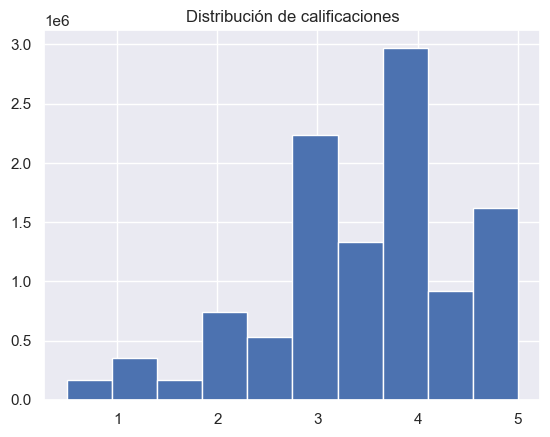

In [6]:
rating['rating'].hist()
plt.title('Distribución de calificaciones')
plt.show()

In [7]:
rating_by_movies = rating.groupby(['movieId']).count()
rating_by_movies.head()

,userId,rating
movieId,,
as1,502,502
as10,513,513
as100,430,430
as1000,485,485
as1001,469,469


In [8]:
idx_max = rating_by_movies['userId'].idxmax()
movie_title = data.loc[data['movieId'] == idx_max, 'title'].iloc[0]
print(movie_title)

from other worlds


In [9]:
idx_min = rating_by_movies['userId'].idxmin()
movie_title = data.loc[data['movieId'] == idx_min, 'title'].iloc[0]
print(movie_title)

mitzi (nbc 1968)


In [10]:
df1_by_movies = rating.groupby(['movieId']).count()
df1_by_movies.sort_values('userId', ascending = False, inplace = True)
df1_by_movies['Vistos'] = df1_by_movies['userId']
df1_by_movies.drop(columns = ['userId','rating'], inplace = True)
df1_by_movies.head(10)

,Vistos
movieId,
as4197,576
as9065,560
ns7279,558
as848,558
hs2360,556
as6998,556
as9469,556
as4889,554
hs582,554


In [11]:
mas_vistos = pd.merge(df1_by_movies, data[['movieId', 'title']], on='movieId')
mas_vistos.head(10)

,movieId,Vistos,title
0,as4197,576,from other worlds
1,as9065,560,the organization
2,ns7279,558,"leapfrog: sing-along, read-along"
3,as848,558,superbook
4,hs2360,556,dietland
5,as6998,556,sideways
6,as9469,556,all good things
7,as4889,554,a stone in the water
8,hs582,554,battle over britney: the conservatorship hearing
9,ns1847,553,el-khawaga's dilemma


In [12]:
data

,platform,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,movieId,duration_int,duration_type,score
0,disney,s1,movie,duck the halls: a mickey mouse christmas special,"alonso ramirez ramos, dave wasson","chris diamantopoulos, tony anselmo, tress macn...",NaN,2021-11-26,2016,TV-G,"animation, family",join mickey and the gang as they duck the halls!,ds1,23.0,min,3.554348
1,disney,s2,movie,ernest saves christmas,john cherry,"jim varney, noelle parker, douglas seale",NaN,2021-11-26,1988,PG,comedy,santa claus passes his magic bag to a new st. ...,ds2,91.0,min,3.493927
2,disney,s3,movie,ice age: a mammoth christmas,karen disher,"raymond albert romano, john leguizamo, denis l...",united states,2021-11-26,2011,TV-G,"animation, comedy, family",sid the sloth is on santa's naughty list.,ds3,23.0,min,3.559395
3,disney,s4,movie,the queen family singalong,hamish hamilton,"darren criss, adam lambert, derek hough, alexa...",NaN,2021-11-26,2021,TV-PG,musical,"this is real life, not just fantasy!",ds4,41.0,min,3.508493
4,disney,s5,tv show,the beatles: get back,NaN,"john lennon, paul mccartney, george harrison, ...",NaN,2021-11-25,2021,G,"docuseries, historical, music",a three-part documentary from peter jackson ca...,ds5,1.0,season,3.546278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22037,hulu,s3064,tv show,samurai harem,NaN,NaN,japan,NaN,2009,TV-14,"anime, comedy, drama",his skill with a sword is magnificent but his ...,hs3064,1.0,season,3.541667
22038,hulu,s3065,tv show,scream queens,NaN,NaN,united states,NaN,2015,TV-14,"comedy, horror, mystery",scream queens is a new genre-bending comedy-ho...,hs3065,2.0,season,3.517751
22039,hulu,s3069,tv show,star trek: the original series,NaN,NaN,united states,NaN,1966,TV-PG,"action, adventure, classics",the 23rd century adventures of captain james t...,hs3069,3.0,season,3.498058
22040,hulu,s3072,tv show,the twilight zone,NaN,NaN,united states,NaN,1959,TV-PG,"classics, science fiction, thriller",rod serling's seminal anthology series focused...,hs3072,5.0,season,3.494163


In [13]:
data['date_added'] = pd.to_datetime(data['date_added'])

In [14]:
fecha_mas_antigua = data[data['date_added'] == data['date_added'].min()]
fecha_mas_reciente = data[data['date_added'] == data['date_added'].max()]

antiguedad= pd.concat([fecha_mas_reciente, fecha_mas_antigua])

antiguedad = antiguedad.drop(["show_id", "show_id", "type", "director", "country", "rating", "release_year", "cast", "listed_in", "description", "movieId", "duration_int", "duration_type", "score"], axis=1)

antiguedad = antiguedad.reset_index(drop=True)

antiguedad

,platform,title,date_added
0,disney,duck the halls: a mickey mouse christmas special,2021-11-26
1,disney,ernest saves christmas,2021-11-26
2,disney,ice age: a mammoth christmas,2021-11-26
3,disney,the queen family singalong,2021-11-26
4,hulu,hikaru no go,2006-07-14


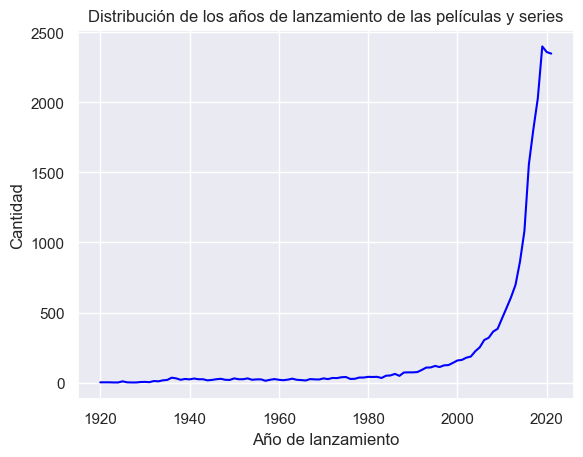

In [15]:
year_counts = data['release_year'].value_counts().sort_index()

# Crear el gráfico de línea
plt.plot(year_counts.index, year_counts.values, color='blue')

# Agregar etiquetas y título
plt.xlabel('Año de lanzamiento')
plt.ylabel('Cantidad')
plt.title('Distribución de los años de lanzamiento de las películas y series')

# Mostrar el gráfico
plt.show()

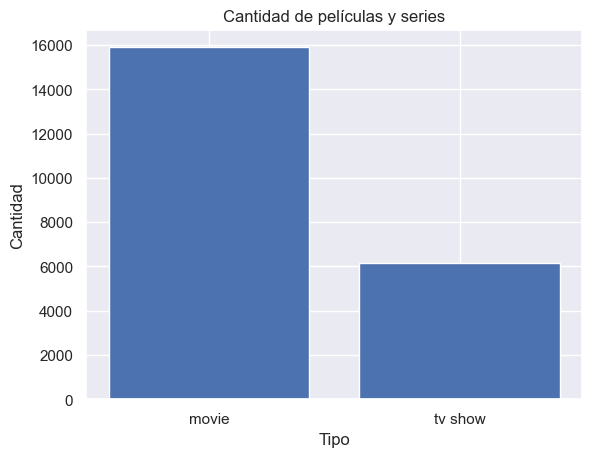

In [16]:
# Cuento el número de películas y series
type_counts = data['type'].value_counts()

# Creo el gráfico de barras
plt.bar(type_counts.index, type_counts.values)

# Agrego títulos y etiquetas de los ejes
plt.title('Cantidad de películas y series')
plt.xlabel('Tipo')
plt.ylabel('Cantidad')

# Muestro el gráfico
plt.show()

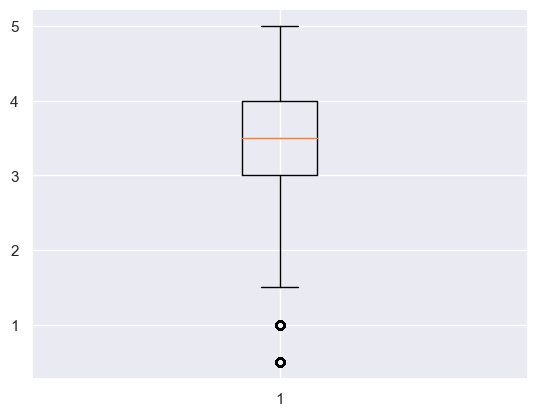

In [17]:
plt.boxplot(rating['rating'])

# Mostrar el gráfico
plt.show()